# Deep Learning Project : Questions Similarity with Siamese Neural Networks

In [1]:
import pandas as pd


data = pd.read_csv('quora_duplicate_questions.tsv', sep='\t')
print(data.head())


   id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0  


In [2]:
data = pd.DataFrame(data)

In [3]:
data

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [4]:
data = data.drop(['id','qid1','qid2'], axis=1)

In [5]:
data.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Creating the cleaning function
def clean(text):
    # Creating object for lemmatization
    wn = nltk.WordNetLemmatizer()
    
    # Tokenizing text data
    tokens = nltk.word_tokenize(text)
    
    # Lemmatization and removing punctuation
    lem_text = [wn.lemmatize(word) for word in tokens if word.isalpha()]
    
    # Lowercase all letters
    lower_text = [word.lower() for word in lem_text]
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    clean_text = [word for word in lower_text if word not in stop_words]
    
    return clean_text


In [7]:
data['question1'] = data['question1'].astype(str).apply(lambda x: clean(x))

In [8]:
data['question2'] = data['question2'].astype(str).apply(lambda x: clean(x))

In [9]:
data

,question1,question2,is_duplicate
0,"[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]",0
1,"[story, kohinoor, diamond]","[would, happen, indian, government, stole, koh...",0
2,"[increase, speed, internet, connection, using,...","[internet, speed, increased, hacking, dns]",0
3,"[mentally, lonely, solve]","[find, remainder, math, divided]",0
4,"[one, dissolve, water, quikly, sugar, salt, me...","[fish, would, survive, salt, water]",0
...,...,...,...
404285,"[many, keywords, racket, programming, language...","[many, keywords, perl, programming, language, ...",0
404286,"[believe, life, death]","[true, life, death]",1
404287,"[one, coin]",[coin],0
404288,"[approx, annual, cost, living, studying, uic, ...","[little, hairfall, problem, want, use, hair, s...",0


### Average of word embeddings for each question in the training set

In [10]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences


train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

sentences = train_data['question1'].tolist() + train_data['question2'].tolist()

# Train Word2Vec model
model = Word2Vec(sentences, min_count=1)

# Calculate average word embeddings for each question in the training set
train_embeddings_question1 = []
train_embeddings_question2 = []

for words in train_data['question1']:
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) > 0:
        train_embeddings_question1.append(np.mean(word_vectors, axis=0))
    else:
        train_embeddings_question1.append(np.zeros(model.vector_size))
        
for words in train_data['question2']:
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) > 0:
        train_embeddings_question2.append(np.mean(word_vectors, axis=0))
    else:
        train_embeddings_question2.append(np.zeros(model.vector_size))


train_embeddings_question1 = np.array(train_embeddings_question1)
train_embeddings_question2 = np.array(train_embeddings_question2)

# Prepare training data
train_X1 = pad_sequences(train_embeddings_question1)
train_X2 = pad_sequences(train_embeddings_question2)
train_y = train_data['is_duplicate'].values

print(train_X1)
print(train_X2)
print(train_y)



[[ 0  0  0 ...  0 -1  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 -1 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  0]
 [ 0  0  1 ...  0  0  1]
 [ 0  0  0 ...  0  0  0]]
[[ 0  0  0 ...  0 -1  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
[0 0 1 ... 1 0 1]


In [11]:
train_X1.shape

(323432, 100)

In [12]:
train_X2.shape

(323432, 100)

In [13]:
train_y.shape

(323432,)

### Average of word embeddings for each question in the testing set

In [14]:
test_embeddings_question1 = []
test_embeddings_question2 = []

for words in test_data['question1']:
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) > 0:
        test_embeddings_question1.append(np.mean(word_vectors, axis=0))
    else:
        test_embeddings_question1.append(np.zeros(model.vector_size))
        
for words in test_data['question2']:
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) > 0:
        test_embeddings_question2.append(np.mean(word_vectors, axis=0))
    else:
        test_embeddings_question2.append(np.zeros(model.vector_size))


test_embeddings_question1 = np.array(test_embeddings_question1)
test_embeddings_question2 = np.array(test_embeddings_question2)

# Prepare testing data
test_X1 = pad_sequences(test_embeddings_question1)
test_X2 = pad_sequences(test_embeddings_question2)
test_y = test_data['is_duplicate'].values

print(test_X1)
print(test_X2)
print(test_y)


[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
[[ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0 -1  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 -1  0]]
[0 0 0 ... 0 0 0]


In [15]:
test_X1.shape

(80858, 100)

In [16]:
test_X2.shape

(80858, 100)

In [17]:
test_y.shape

(80858,)

# Manhattan Siamese LSTM for Question Similarity


Epoch 1/20
2527/2527 [==============================] - 36s 10ms/step - loss: 0.6547 - accuracy: 0.6373 - val_loss: 0.5942 - val_accuracy: 0.7112
Epoch 2/20
2527/2527 [==============================] - 26s 10ms/step - loss: 0.5713 - accuracy: 0.7225 - val_loss: 0.5633 - val_accuracy: 0.7264
Epoch 3/20
2527/2527 [==============================] - 26s 10ms/step - loss: 0.5542 - accuracy: 0.7337 - val_loss: 0.5542 - val_accuracy: 0.7322
Epoch 4/20
2527/2527 [==============================] - 25s 10ms/step - loss: 0.5440 - accuracy: 0.7414 - val_loss: 0.5475 - val_accuracy: 0.7353
Epoch 5/20
2527/2527 [==============================] - 25s 10ms/step - loss: 0.5351 - accuracy: 0.7465 - val_loss: 0.5411 - val_accuracy: 0.7379
Epoch 6/20
2527/2527 [==============================] - 27s 11ms/step - loss: 0.5264 - accuracy: 0.7508 - val_loss: 0.5348 - val_accuracy: 0.7398
Epoch 7/20
2527/2527 [==============================] - 27s 11ms/step - loss: 0.5184 - accuracy: 0.7548 - val_loss: 0.5299 -

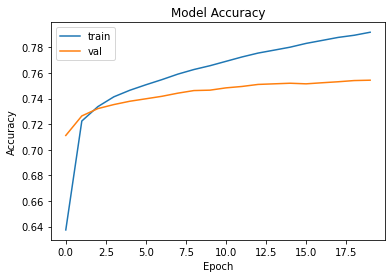

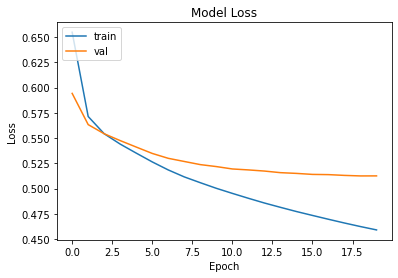

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Concatenate, Dense, Lambda, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
import tensorflow.keras.backend as K

def manhattan_distance(inputs):
    x, y = inputs
    return K.exp(-K.sum(K.abs(x - y), axis=1, keepdims=True))


def manhattan_siamese_lstm_model(input_shape, lstm_units=64):
    
    input1 = Input(shape=input_shape)
    input2 = Input(shape=input_shape)

    
    reshaped_input1 = Reshape((1, input_shape[0]))(input1)
    reshaped_input2 = Reshape((1, input_shape[0]))(input2)

    
    lstm1 = LSTM(lstm_units)(reshaped_input1)

    lstm2 = LSTM(lstm_units)(reshaped_input2)

    distance = Lambda(manhattan_distance)([lstm1, lstm2])

    output = Dense(1, activation='sigmoid')(distance)

    model = Model(inputs=[input1, input2], outputs=output)

    return model



input_shape = (train_X1.shape[1],)


model = manhattan_siamese_lstm_model(input_shape)

# Compile the model
model.compile(loss=binary_crossentropy, optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit([train_X1, train_X2], train_y, batch_size=128, epochs=20, validation_data=([test_X1, test_X2], test_y))

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
